<div style="line-height:0.5">
<h1 style="color:slateblue "> Matplotlib trials 1 </h1>
</div>
<div style="line-height:1.5">
<div style="margin-top: -14px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> plots +  legend bbox_to_anchor + twiny + annotations + adjust subplot spacing + suptitle()
</span>
</div>
</div>

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mpl

<h2 style="color:slateblue "> Example #1 </h2>

In [62]:
tips_data = sns.load_dataset("tips")
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


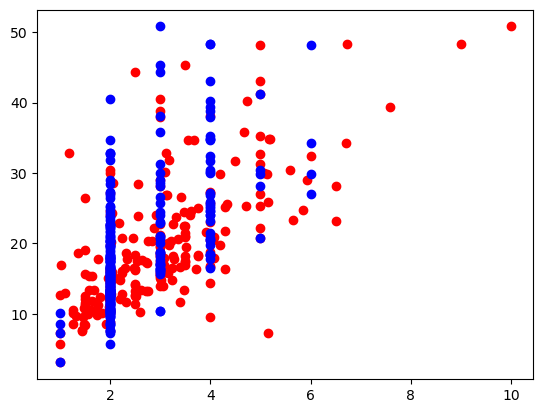

In [63]:
plt.scatter(tips_data['tip'], tips_data['total_bill'], c='r')
plt.scatter(tips_data['size'], tips_data['total_bill'], c='b')
plt.show()

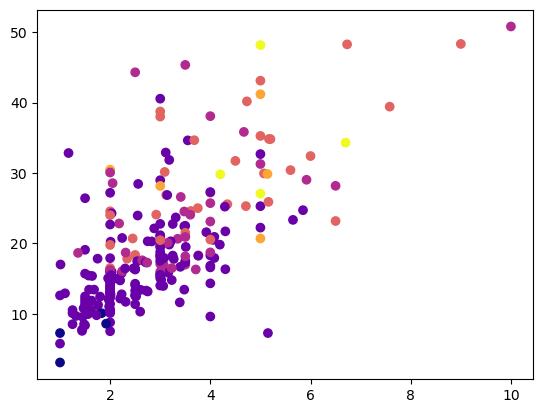

In [64]:
# with colormaps
plt.scatter(tips_data['tip'], tips_data['total_bill'], c=tips_data['size'], cmap = plt.cm.plasma)
plt.show()

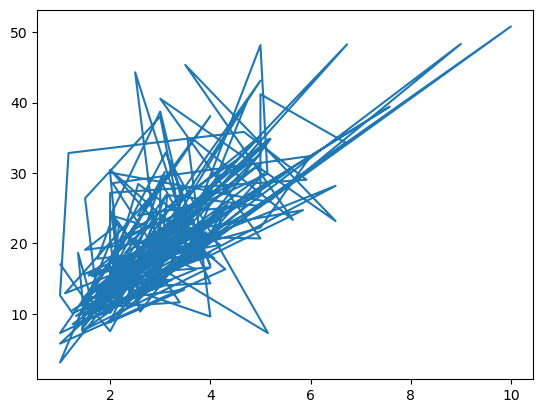

In [65]:
plt.plot(tips_data['tip'], tips_data['total_bill'])
plt.show()

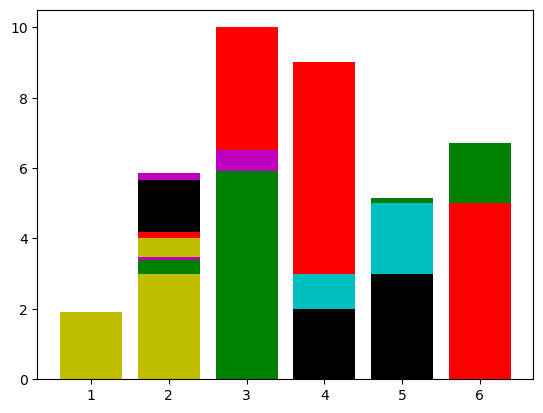

In [66]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.bar(tips_data['size'], height = tips_data['tip'], color=colors)
plt.show()

<h2 style="color:slateblue "> Example #2 </h2>

In [67]:
np.random.seed(3)
## Create two arrays 100 rows, 200 columns
data1 = np.random.randn(200, 300) 
data2 = np.random.randn(200, 300) 
data1.shape, data2.shape

((200, 300), (200, 300))

plt.subplots() without any arguments returns a single figure and axes object (fig, ax) => creating a single subplot with 1 row and 1 column.       
Functions like scatter, hist need an axes to handle multiple arrays
+ plt.subplots() gives us the fig, ax handles for these functions
+ plt.plot() won't work because it only takes one set of data

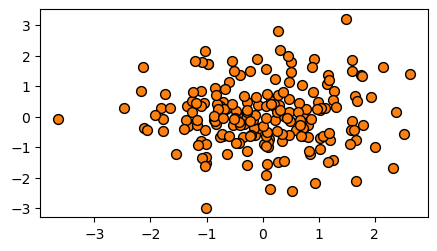

In [68]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1[:,0], data2[:,0], s=50, facecolor='C1', edgecolor='k') #black outline
plt.show()

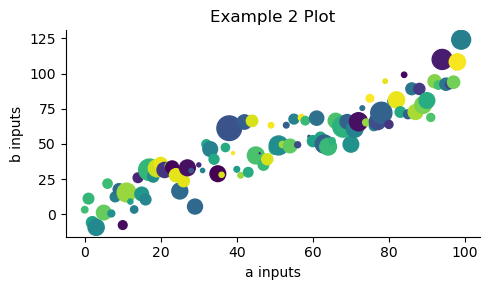

In [69]:
np.random.seed(81)  
# shape of arrays should be the same = 100
data = {'a': np.arange(100),
        'c': np.random.randint(0, 100, 100),
        'd': np.random.randn(100)}
data['b'] = data['a'] + 10 * np.random.randn(100)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 3), layout='tight')
ax.scatter('a', 'b', c='c', s='d', data=data)

# Remove upper and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title("Example 2 Plot")
ax.set_xlabel('a inputs')
ax.set_ylabel('b inputs'); #to avoid plt.show() in jupyter

In [70]:
# Create 4 random data sets
np.random.seed(3)
data1, data2, data3, data4 = np.random.randn(4, 100)

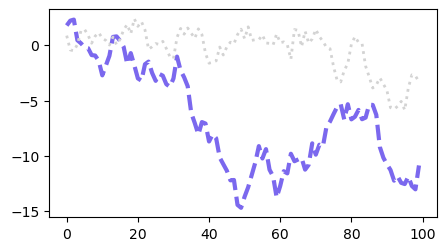

In [71]:
""" Plot cumulative function => sum of the elements along a given axis. """
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='mediumslateblue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='lightgray', linewidth=2)
l.set_linestyle(':')

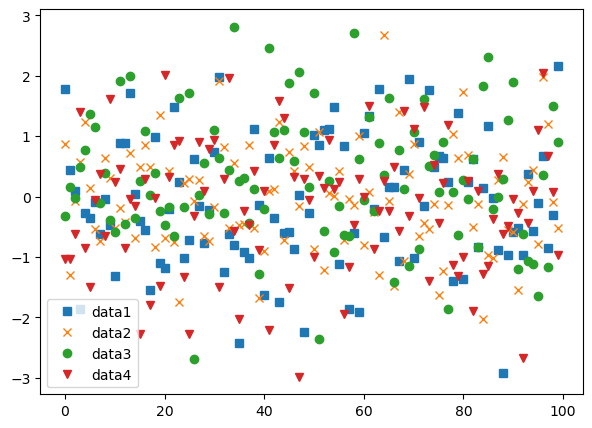

In [72]:
# Set of subplots.
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data1, 's', label='data1')
ax.plot(data2, 'x', label='data2')
ax.plot(data3, 'o', label='data3')
ax.plot(data4, 'v', label='data4')
ax.legend(loc='lower left')
plt.show()

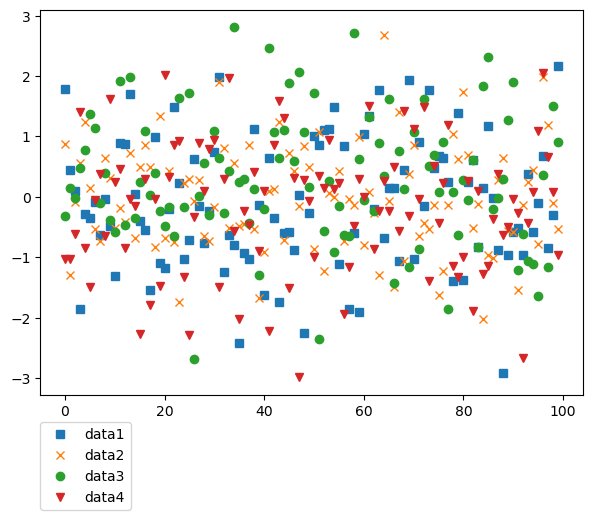

In [73]:
# Move legend outside plot
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(data1, 's', label='data1')
ax.plot(data2, 'x', label='data2')
ax.plot(data3, 'o', label='data3')
ax.plot(data4, 'v', label='data4')
ax.legend(loc='lower left')
plt.legend(bbox_to_anchor=(0, -0.3, 1, 0), loc='lower left', borderaxespad=0)
plt.show()

<h2 style="color:slateblue "> Example #3 </h2>

In [74]:
a = [0, 1, 2, 3]
b = [10, 20, 30, 40, 50]
c = [1000, 2000, 3000, 4000]
aa = [5, 6, 7, 8]
bb = [50, 60, 70, 80, 90]
cc = [5000, 6000, 7000, 8000]
d = [7, 8, 9, 10]
dd = [117, 118, 119, 110]

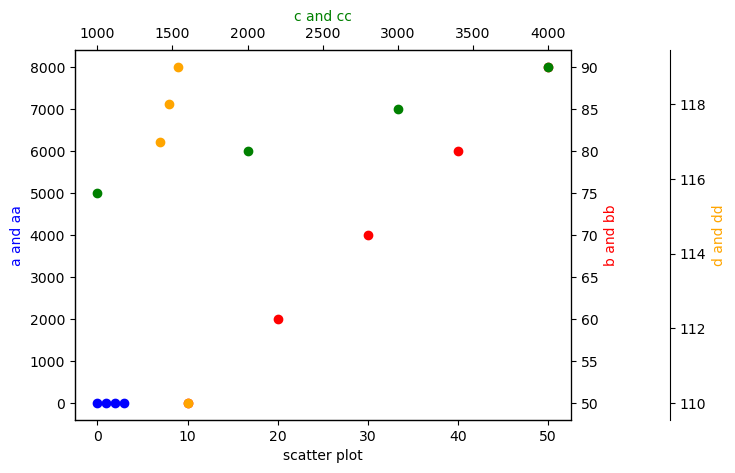

In [75]:
fig, ax1 = plt.subplots()

# create the first scatter plot (a,aa)
ax1.scatter(a, aa, color='blue')
ax1.set_xlabel('scatter plot')
ax1.set_ylabel('a and aa', color='blue')

# create a second set of axes sharing the same x-axis as the first set
ax2 = ax1.twinx()
# create the second scatter plot (b,bb)
ax2.scatter(b, bb, color='red')
ax2.set_ylabel('b and bb', color='red')

# create a third set of axes sharing the same x-axis as the first set
ax3 = ax1.twiny()
# create the third scatter plot (c,cc)
ax3.scatter(c, cc, color='green')
ax3.set_xlabel('c and cc', color='green')

# create a fourth set of axes sharing the same x-axis as the first set
ax4 = ax1.twinx()
# create the fourth scatter plot (d,dd)
ax4.scatter(d, dd, color='orange')
ax4.set_ylabel('d and dd', color='orange')

# adjust the position of the fourth set of axes so it doesn't overlap with the third set
ax4.spines['right'].set_position(('axes', 1.2))

plt.show()

<h2 style="color:slateblue "> Example #4 </h2>

50


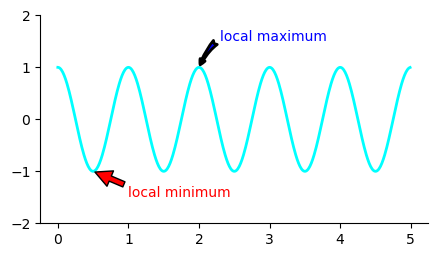

In [76]:
""" Add annotationts to plot. 
- xy = (tail of the arrow)
- xytext = data coordinates where the text will be positioned.
- arrowprops = dictionary of properties
Available arrow styles
    * ->': Basic arrow;
    * fancy: Fancy arrow with curved lines;
    * simple: Arrow without head;
    * bar: Bar arrow;
    * barfraction=0.3': Bar arrow with a fraction of the arrowhead width;
    * circle: Circle arrow style;
    * wedge: Wedge arrow without a tail;
    * wedge, tail_width=0.7': Wedge-shaped arrow;
    * wedge, tail_width=0.5,shrink_factor=0.2': A combination of wedge and tail properties;
    * wedge, tail_width=0.7,shrink_factor=0.2': Another variation of the wedge arrow;
"""
fig, ax = plt.subplots(figsize=(5,2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2, c='cyan') 

ax.annotate('local maximum', xy=(2, 1), xytext=(2.3, 1.5), c = 'b', arrowprops=dict(facecolor='blue', 
                arrowstyle='fancy', linewidth = 2.0, connectionstyle='arc3,rad=0.5')) #remove shrink param when arrowstyle specified
# Find local minimum coordinates
local_min_index = np.argmin(s)
print(local_min_index)
local_min_x = t[local_min_index]
local_min_y = s[local_min_index]

# Remove upper and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate local minimum
ax.annotate('local minimum', xy=(local_min_x, local_min_y), xytext=(local_min_x + 0.5, local_min_y - 0.5),
            color='red', arrowprops=dict(facecolor='red', shrink=0.05))

ax.set_ylim(-2,2)
plt.show()

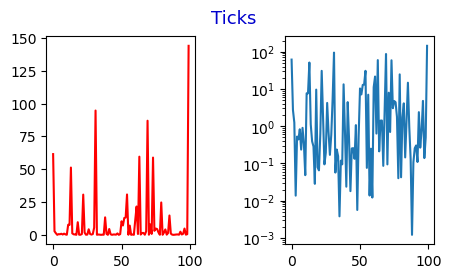

In [77]:
""" Ticks and log-scale. Two adjacent plots in same figure """
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7)) #subplot_wspace=0.3, subplot_hspace=0.5)
# Dynamically change the subplot spacing 
fig.subplots_adjust(wspace=0.6, hspace=0.5)

# Sequential set of numbers to represent the order or rank of data point
xdata = np.arange(len(data1)) 
data = 10**data1

# Plot 1
axs[0].plot(xdata, data, c='r')
# Plot 2
axs[1].set_yscale('log')
axs[1].plot(xdata, data)

# Add a global title, since ax is not defined => ax.set_title("Ticks") does not work
fig.suptitle('Ticks', fontsize=13, color='mediumblue')
plt.show()

[[ 0.08905337  0.7788969   1.26464491 ... -0.66458388 -0.81945109
   0.68088412]
 [-0.58784355 -0.86903192 -1.50636278 ...  0.34761652  1.55995984
  -0.50307522]
 [ 0.03468126  1.13200741 -2.55672653 ... -2.25992767 -1.85632431
  -1.36993157]
 ...
 [-0.34504399 -0.68576463  0.31310568 ...  0.19004937 -0.4533285
   0.01181563]
 [-0.17302687 -2.51912888 -0.10322312 ... -0.2138987  -0.97732085
   0.87206561]
 [-0.30174367  0.72265612  0.08944855 ... -0.85957285  0.15131904
  -0.44617282]]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 12

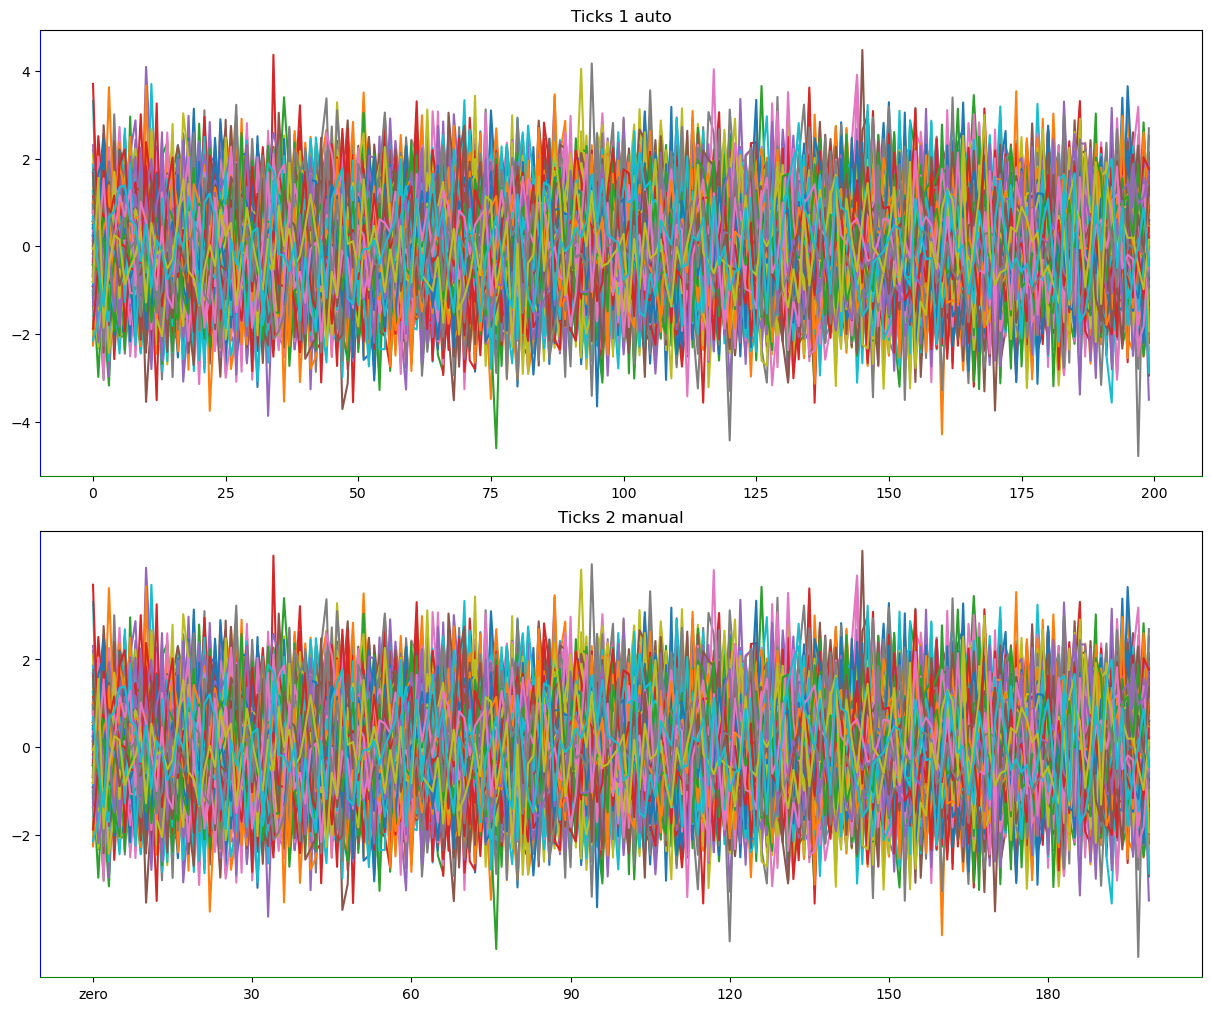

In [78]:
""" Ticks. Two plots in same figure one above the other. """
# Create data
data1_new = np.random.randn(200, 300)
xdata_new = np.arange(len(data1_new))

print(data1_new)
print(xdata_new)

fig, axs = plt.subplots(2, 1, layout='constrained',  figsize=(12, 10))
# Plot data1_new against xdata_new
axs[0].plot(xdata_new, data1_new)
axs[0].set_title('Ticks 1 auto')

#### Same plot with custom tick positions and labels on the x-axis value
axs[1].plot(xdata_new, data1_new)
xticks = np.arange(0, len(xdata_new), 30)
xtick_labels = ['zero', '30', '60', '90', '120', '150', '180', '210', '240', '270']
axs[1].set_xticks(xticks)
# Use only the needed labels
axs[1].set_xticklabels(xtick_labels[:len(xticks)])  
# Adjusted yticks for the new data
axs[1].set_yticks([-2.0, 0, 2.0])  
axs[1].set_title('Ticks 2 manual')

# Change axes colors
for ax in axs:
    ax.spines['left'].set_edgecolor('blue')  
    ax.spines['bottom'].set_edgecolor('green')  

plt.show()

<h3 style="color:slateblue "> Colored maps </h3>

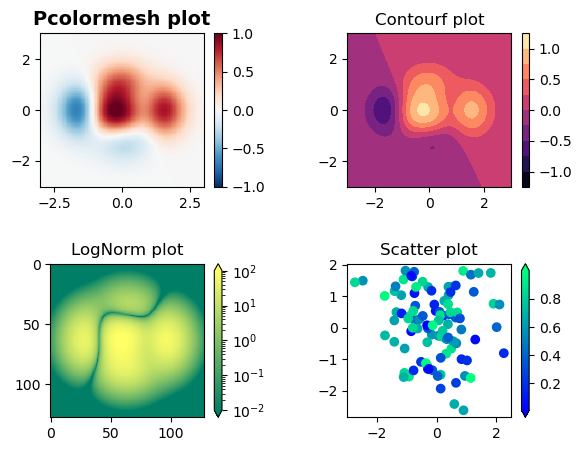

In [79]:
data1 = np.random.normal(size=100)
data2 = np.random.normal(size=100)
data3 = np.random.uniform(size=100)
data4 = np.linspace(0, 1, 100)

# Generate meshgrid of x,y coordinates spanning -3 to 3 with 128 sample points
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
# Define the function a gaussian-like function
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2) # remove layout='constrained' to custom spacing
# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.5)

# Plot Z on the first subplot using pcolormesh
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
# Add the color bar to the first subplot
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('Pcolormesh plot', fontdict={'fontsize': 14, 'fontweight': 'bold'})


# Plot Z on the second subplot using contourf
co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11), cmap='magma')
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('Contourf plot')

# Plot Z^2 on the third subplot using imshow with a log color scale
pc = axs[1, 0].imshow(Z**2 * 100, cmap='summer', norm=mpl.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('LogNorm plot')

# Plot scatter dummy data on the fourth subplot
pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='winter')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('Scatter plot')
plt.show()